<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Spatial_Temporal_GNNDroughtPrediction200k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
processed_dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")

In [ ]:
processed_dataset

Unnamed: 0   Month     Lat     Lon  temperature_2m  temperature_2m_min  \
0             287  201505  15.271 -17.068         297.249             291.684   
1             287  201506  15.271 -17.068         298.479             292.966   
2             287  201507  15.271 -17.068         300.038             296.358   
3             287  201508  15.271 -17.068         300.277             297.167   
4             287  201509  15.271 -17.068         300.453             296.962   
...           ...     ...     ...     ...             ...                 ...   
83575         387  202304  11.678  51.204         299.834             294.269   
83576         387  202305  11.678  51.204         301.408             294.354   
83577         387  202306  11.678  51.204         302.933             296.843   
83578         387  202307  11.678  51.204         304.032             299.200   
83579         387  202308  11.678  51.204         303.200             298.097   

       temperature_2m_max  dewpoint_temperature_2m  total_precipitation_sum  \
0                 304.108                  292.141                 0.000248   
1                 307.924                  293.551                 0.000030   
2                 304.813                  295.583                 0.039828   
3                 304.959                  297.178                 0.201599   
4                 304.370                  297.498                 0.118411   
...                   ...                      ...                      ...   
83575             306.253                  293.895                 0.005088   
83576             307.231                  295.266                 0.019854   
83577             309.328                  292.453                 0.000158   
83578             309.950                  290.167                 0.000038   
83579             310.122                  290.921                 0.000185   

       total_precipitation_min  ...      EVI  next_month_tempreature  \
0                 0.000000e+00  ...  1132.95                 303.650   
1                 0.000000e+00  ...  1116.97                 302.250   
2                 0.000000e+00  ...  1368.95                 302.435   
3                 8.638150e-08  ...  2475.59                 303.790   
4                 8.523460e-07  ...  2849.36                 304.714   
...                        ...  ...      ...                     ...   
83575             1.009060e-07  ...  1300.87                 303.895   
83576             3.091570e-07  ...  1210.34                 305.717   
83577             0.000000e+00  ...  1144.27                 305.315   
83578             0.000000e+00  ...  1043.21                 303.643   
83579             0.000000e+00  ...  1060.97                 304.022   

       next_month_precipitation    spei01    spei03    datetime  year  month2  \
0                  3.938450e-06 -1.030740 -0.937773  2015-05-01  2015       5   
1                  3.481040e-06 -1.983540 -1.747770  2015-06-01  2015       6   
2                  1.429650e-05 -0.773948 -1.519480  2015-07-01  2015       7   
3                  6.708030e-05  1.125420  0.176900  2015-08-01  2015       8   
4                  1.539020e-06  0.593335  0.588032  2015-09-01  2015       9   
...                         ...       ...       ...         ...   ...     ...   
83575              1.717400e-06  1.432950  0.334410  2023-04-01  2023       4   
83576              4.468630e-07  0.317675  0.610513  2023-05-01  2023       5   
83577              3.380950e-08  0.585810  0.947582  2023-06-01  2023       6   
83578              4.085260e-06  1.418990  0.833237  2023-07-01  2023       7   
83579              8.440640e-07  0.518092  0.864057  2023-08-01  2023       8   

       next_month_soil_moisture_am  next_month_spei01  
0                         0.148753          -1.983540  
1                         0.169415          -0.773948  
2                         0.229645           1.125420  
3                      

In [4]:
import networkx as nx
from geopy.distance import geodesic

In [5]:
sort_processed_dataset = processed_dataset.sort_values(by=["Month",'Lat','Lon'])
sort_processed_dataset

Unnamed: 0   Month     Lat     Lon  temperature_2m  temperature_2m_min  \
36896         832  201505 -33.238  18.865         288.610             280.177   
40496         833  201505 -33.238  20.661         286.602             277.234   
44196         834  201505 -33.238  22.458         287.657             277.419   
47996         835  201505 -33.238  24.255         288.242             279.026   
51696         836  201505 -33.238  26.051         288.644             279.236   
...           ...     ...     ...     ...             ...                 ...   
16798           0  202308  36.831   2.695         299.798             292.088   
18598           1  202308  36.831   4.492         298.952             290.859   
20498           2  202308  36.831   6.288         299.179             290.378   
22398           3  202308  36.831   8.085         299.810             291.612   
24697           4  202308  36.831   9.881         300.416             290.927   

       temperature_2m_max  dewpoint_temperature_2m  total_precipitation_sum  \
36896             303.344                  282.436                 0.020975   
40496             299.677                  276.598                 0.012716   
44196             300.492                  277.622                 0.010376   
47996             302.691                  278.494                 0.005209   
51696             303.139                  281.658                 0.011727   
...                   ...                      ...                      ...   
16798             308.027                  292.618                 0.003091   
18598             308.724                  290.093                 0.009672   
20498             310.346                  290.137                 0.008554   
22398             314.138                  290.430                 0.004998   
24697             316.689                  289.995                 0.004219   

       total_precipitation_min  ...      EVI  next_month_tempreature  \
36896                      0.0  ...  1579.13                 284.951   
40496                      0.0  ...  1065.27                 283.865   
44196                      0.0  ...  1144.62                 284.058   
47996                      0.0  ...  1457.66                 284.624   
51696                      0.0  ...  2827.40                 287.150   
...                        ...  ...      ...                     ...   
16798                      0.0  ...  1375.94                 300.270   
18598                      0.0  ...  1451.00                 299.869   
20498                      0.0  ...  1682.16                 299.597   
22398                      0.0  ...  1509.14                 299.815   
24697                      0.0  ...  1417.39                 299.922   

       next_month_precipitation    spei01    spei03    datetime  year  month2  \
36896                  0.000036 -0.646173 -1.422560  2015-05-01  2015       5   
40496                  0.000017 -0.060123 -0.716875  2015-05-01  2015       5   
44196                  0.000023 -0.395736 -0.197511  2015-05-01  2015       5   
47996                  0.000024 -0.034155  1.049300  2015-05-01  2015       5   
51696                  0.000034 -0.772399  0.596915  2015-05-01  2015       5   
...                         ...       ...       ...         ...   ...     ...   
16798                  0.000044 -3.007470 -2.283540  2023-08-01  2023       8   
18598                  0.000031 -2.610690 -1.962180  2023-08-01  2023       8   
20498                  0.000027 -2.657440 -1.154330  2023-08-01  2023       8   
22398                  0.000023 -1.496310 -1.311100  2023-08-01  2023       8   
24697                  0.000015 -1.055090 -1.915220  2023-08-01  2023       8   

       next_month_soil_moisture_am  next_month_spei01  
36896                     0.251283           0.642206  
40496                     0.208038           2.460590  
44196                     0.236802           1.896360  
47996                  

In [9]:
sort_processed_dataset["row_index"] = sort_processed_dataset.index

In [ ]:
sort_processed_dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01', 'row_index'],
      dtype='object')

In [ ]:
#smaller dataset used for testing
three_month_dataset = sort_processed_dataset[sort_processed_dataset["Month"].isin([201505, 201506, 201507])]

In [ ]:
three_month_dataset

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0   Month     Lat     Lon  \
36896         36896           832         832  201505 -33.238  18.865   
40496         40496           833         833  201505 -33.238  20.661   
44196         44196           834         834  201505 -33.238  22.458   
47996         47996           835         835  201505 -33.238  24.255   
51696         51696           836         836  201505 -33.238  26.051   
...             ...           ...         ...     ...     ...     ...   
16701         16701          1676           0  201507  36.831   2.695   
18501         18501          1677           1  201507  36.831   4.492   
20401         20401          1678           2  201507  36.831   6.288   
22301         22301          1679           3  201507  36.831   8.085   
24600         24600          1680           4  201507  36.831   9.881   

       temperature_2m  temperature_2m_min  temperature_2m_max  \
36896         288.610             280.177             303.344   
40496         286.602             277.234             299.677   
44196         287.657             277.419             300.492   
47996         288.242             279.026             302.691   
51696         288.644             279.236             303.139   
...               ...                 ...                 ...   
16701         300.353             293.030             309.171   
18501         299.238             291.321             308.161   
20401         299.959             290.885             311.877   
22301         300.016             291.303             312.436   
24600         300.941             291.377             315.536   

       dewpoint_temperature_2m  ...     NDVI      EVI  next_month_tempreature  \
36896                  282.436  ...  3183.19  1579.13                 284.951   
40496                  276.598  ...  2342.47  1065.27                 283.865   
44196                  277.622  ...  2539.90  1144.62                 284.058   
47996                  278.494  ...  3223.51  1457.66                 284.624   
51696                  281.658  ...  5622.32  2827.40                 287.150   
...                        ...  ...      ...      ...                     ...   
16701                  292.229  ...  2513.70  1591.47                 300.604   
18501                  289.708  ...  2451.00  1597.00                 300.809   
20401                  289.940  ...  2583.16  1696.82                 300.668   
22301                  290.518  ...  2344.65  1654.86                 301.121   
24600                  289.370  ...  2184.04  1554.57                 300.939   

       next_month_precipitation    spei01    spei03    datetime  year  month2  \
36896                  0.000036 -0.646173 -1.422560  2015-05-01  2015       5   
40496                  0.000017 -0.060123 -0.716875  2015-05-01  2015       5   
44196                  0.000023 -0.395736 -0.197511  2015-05-01  2015       5   
47996                  0.000024 -0.034155  1.049300  2015-05-01  2015       5   
51696                  0.000034 -0.772399  0.596915  2015-05-01  2015       5   
...                         ...       ...       ...         ...   ...     ...   
16701                  0.000001 -2.261410 -1.873510  2015-07-01  2015       7   
18501                  0.000003 -1.836050 -1.868080  2015-07-01  2015       7   
20401                  0.000004 -1.862700 -1.576210  2015-07-01  2015       7   
22301                  0.000007 -1.020560 -1.140980  2015-07-01  2015       7   
24600                  0.000002 -1.173440 -1.408870  2015-07-01  2015       7   

       next_month_soil_moisture_am  
36896                     0.251283  
40496                     0.208038  
44196                     0.236802  
47996                     0.201857  
51696                     0.235473  
...                            ...  
16701                     0.121016  
18501                     0.178833  
20401                     0.175729  
22301                     0.18764

**Spatial-Temporal Graph**

In [6]:
Spatial_temporal_graph = nx.Graph()

In [7]:
#reserved for testing versions of the graph
Spatial_temporal_graph_test = nx.Graph()

In [10]:
# Add nodes with features
for index, row in sort_processed_dataset.iterrows():
    Spatial_temporal_graph.add_node(index, **row[["row_index","Month",'Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01', "next_month_soil_moisture_am", "next_month_spei01"]].to_dict())

print("finished creating node features")

finished creating node features


In [ ]:
#Version of the graph with color attributes by the month; CODE DOESN'T WORK
colors =[
    'aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure',
    'beige', 'bisque', 'black', 'blanchedalmond', 'blue',
    'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse',
    'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson',
    'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray',
    'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen',
    'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
    'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet',
    'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue',
    'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
    'ghostwhite', 'gold', 'goldenrod', 'gray', 'green',
    'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred',
    'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush',
    'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan',
    'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink',
    'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightslategrey',
    'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen',
    'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid',
    'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise',
    'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin'
]

# Assuming 'sort_processed_dataset' has a 'Month' column
unique_months = sort_processed_dataset['Month'].unique()
month_color_map = {}

for i, month in enumerate(unique_months):
    month_color_map[month] = colors[i % len(colors)]

for index, row in sort_processed_dataset.iterrows():
    node_color = month_color_map[row['Month']]
    Spatial_temporal_graph.add_node(index, color=node_color, **row[["row_index","Month",'Lat', 'Lon', 'temperature_2m', 'temperature_2m_min',
                             'temperature_2m_max', 'dewpoint_temperature_2m', 'total_precipitation_sum',
                             'total_precipitation_min', 'total_precipitation_max', 'u_component_of_wind_10m',
                             'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
                             'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
                             'EVI', 'next_month_tempreature', 'next_month_precipitation', 'year', 'month2', 'spei01']].to_dict())

print("finished creating node features")

finished creating node features


In [11]:
unique_list_of_months = list(set(sort_processed_dataset["Month"]))
unique_list_of_months.sort()
unique_list_of_months

[201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212,
 202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308]

**Distance-Based Spatial Graph**

In [ ]:
import numpy as np
import math

def EuclideanDistance(x1, y1, x2, y2):
  return math.pow((math.pow((x1-x2),2)+math.pow((y1-y2),2)), 1/2)

In [ ]:
indices = tree.query_ball_point([row['Lat'], row['Lon']], 2)
indices

[834, 835, 830]

In [ ]:
sort_processed_dataset.iloc[total_index + 834]["row_index"]

22397

In [ ]:
sort_processed_dataset.iloc[total_index + 835]["row_index"]

24696

In [ ]:
row_1 = sort_processed_dataset.query('row_index == 24696')

In [ ]:
row_1

Unnamed: 0   Month     Lat    Lon  temperature_2m  temperature_2m_min  \
24696           4  202307  36.831  9.881         304.328             292.187   

       temperature_2m_max  dewpoint_temperature_2m  total_precipitation_sum  \
24696             319.806                  289.608                  0.00223   

       total_precipitation_min  ...  next_month_tempreature  \
24696                      0.0  ...                 301.452   

       next_month_precipitation   spei01    spei03    datetime  year  month2  \
24696                  0.000001 -3.47208 -0.093699  2023-07-01  2023       7   

       next_month_soil_moisture_am  next_month_spei01  row_index  
24696                     0.072868           -1.05509      24696  

[1 rows x 29 columns]

In [ ]:
row_2 = sort_processed_dataset.query('row_index == 22397')
row_2

Unnamed: 0   Month     Lat    Lon  temperature_2m  temperature_2m_min  \
22397           3  202307  36.831  8.085         303.244             291.545   

       temperature_2m_max  dewpoint_temperature_2m  total_precipitation_sum  \
22397             318.337                  291.471                 0.002905   

       total_precipitation_min  ...  next_month_tempreature  \
22397                      0.0  ...                 302.211   

       next_month_precipitation   spei01   spei03    datetime  year  month2  \
22397                  0.000006 -4.04076  1.42398  2023-07-01  2023       7   

       next_month_soil_moisture_am  next_month_spei01  row_index  
22397                     0.163241           -1.49631      22397  

[1 rows x 29 columns]

In [ ]:
EuclideanDistance(36.831, 9.881, 36.831, 8.085)

NameError: ignored

In [ ]:
Spatial_temporal_graph.clear_edges()

In [ ]:
dataset_subset[['Lat', 'Lon']]

Lat     Lon
36995 -33.238  18.865
40595 -33.238  20.661
44295 -33.238  22.458
48095 -33.238  24.255
51795 -33.238  26.051
...       ...     ...
16798  36.831   2.695
18598  36.831   4.492
20498  36.831   6.288
22398  36.831   8.085
24697  36.831   9.881

[836 rows x 2 columns]

In [12]:
from scipy.spatial import KDTree
total_index=0

for month in unique_list_of_months:
    dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]

    # Create a KDTree for efficient spatial queries
    tree = KDTree(dataset_subset[['Lat', 'Lon']])

    # Iterate through each row in the dataset
    for i, row in dataset_subset.iterrows():
        # Query the tree for points within 3 units
        indices = tree.query_ball_point([row['Lat'], row['Lon']], 3)

        # Add edges to the graph
        for j in indices:
            j_row_index = sort_processed_dataset.iloc[total_index + j]["row_index"]
            if i != j_row_index:  # Avoid adding self-loops
                Spatial_temporal_graph.add_edge(i, j_row_index)
                #print("Edge Added: "+str(i)+", "+str(j_row_index))

    total_index += len(dataset_subset)
    print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


In [ ]:
total_index=0

for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]

  for i, row_i in dataset_subset.iterrows():
    for j, row_j in dataset_subset.iterrows():
      if EuclideanDistance(row_i["Lat"], row_i["Lon"], row_j["Lat"], row_j["Lon"]) <= 2:
        Spatial_temporal_graph.add_edge(j, i)

  total_index = len(dataset_subset) + total_index
  print("nodes processed: " + str(total_index))

KeyboardInterrupt: ignored

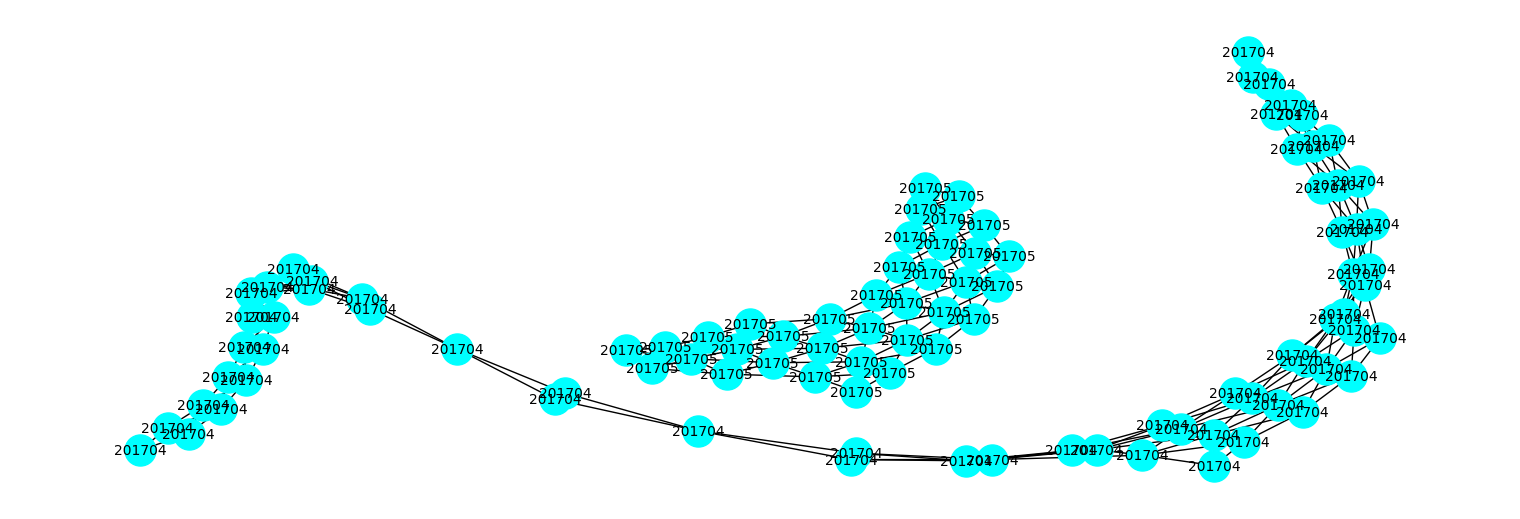

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 20000, 20100, "Month")

**Grid Spatial Graph**

In [ ]:
#Create Spatial Edges
for month in unique_list_of_months:
  dataset_subset = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  curLat = 0
  prevNode = 0

  #Add east-west edges
  dataset_subset = dataset_subset.sort_values(by=['Lat','Lon'])

  for i, row_i in dataset_subset.iterrows():
    if curLat == row_i["Lat"]:
      Spatial_temporal_graph.add_edge(prevNode, i)
      prevNode = i
    else:
      curLat = row_i["Lat"]
      prevNode = i

  #Add north-south edges
  dataset_subset = dataset_subset.sort_values(by=['Lon','Lat'])
  prevNode = 0
  curLon = 0

  for i, row_i in dataset_subset.iterrows():
    if curLon == row_i["Lon"]:
      Spatial_temporal_graph.add_edge(prevNode, i)
      #print(i)
      #print("edge created: "+str(prevNode)+" "+str(i))
      prevNode = i
    else:
      curLon = row_i["Lon"]
      prevNode = i

KeyboardInterrupt: ignored

In [ ]:
len(Spatial_temporal_graph)

83580

In [ ]:
len(node_colors)

83580

In [ ]:
#evalute the distribution of node colors for error analysis
from collections import Counter

frequency_distribution = Counter(node_colors)

distribution_dict = dict(frequency_distribution)

print(frequency_distribution)
print(distribution_dict)

Counter({'aliceblue': 836, 'antiquewhite': 836, 'aqua': 836, 'aquamarine': 836, 'azure': 836, 'beige': 836, 'bisque': 836, 'black': 836, 'blanchedalmond': 836, 'blue': 836, 'blueviolet': 836, 'brown': 836, 'burlywood': 836, 'cadetblue': 836, 'chartreuse': 836, 'chocolate': 836, 'coral': 836, 'cornflowerblue': 836, 'cornsilk': 836, 'crimson': 836, 'cyan': 836, 'darkblue': 836, 'darkcyan': 836, 'darkgoldenrod': 836, 'darkgray': 836, 'darkgreen': 836, 'darkgrey': 836, 'darkkhaki': 836, 'darkmagenta': 836, 'darkolivegreen': 836, 'darkorange': 836, 'darkorchid': 836, 'darkred': 836, 'darksalmon': 836, 'darkseagreen': 836, 'darkslateblue': 836, 'darkslategray': 836, 'darkslategrey': 836, 'darkturquoise': 836, 'darkviolet': 836, 'deeppink': 836, 'deepskyblue': 836, 'dimgray': 836, 'dimgrey': 836, 'dodgerblue': 836, 'firebrick': 836, 'floralwhite': 836, 'forestgreen': 836, 'fuchsia': 836, 'gainsboro': 836, 'ghostwhite': 836, 'gold': 836, 'goldenrod': 836, 'gray': 836, 'green': 836, 'greenyello

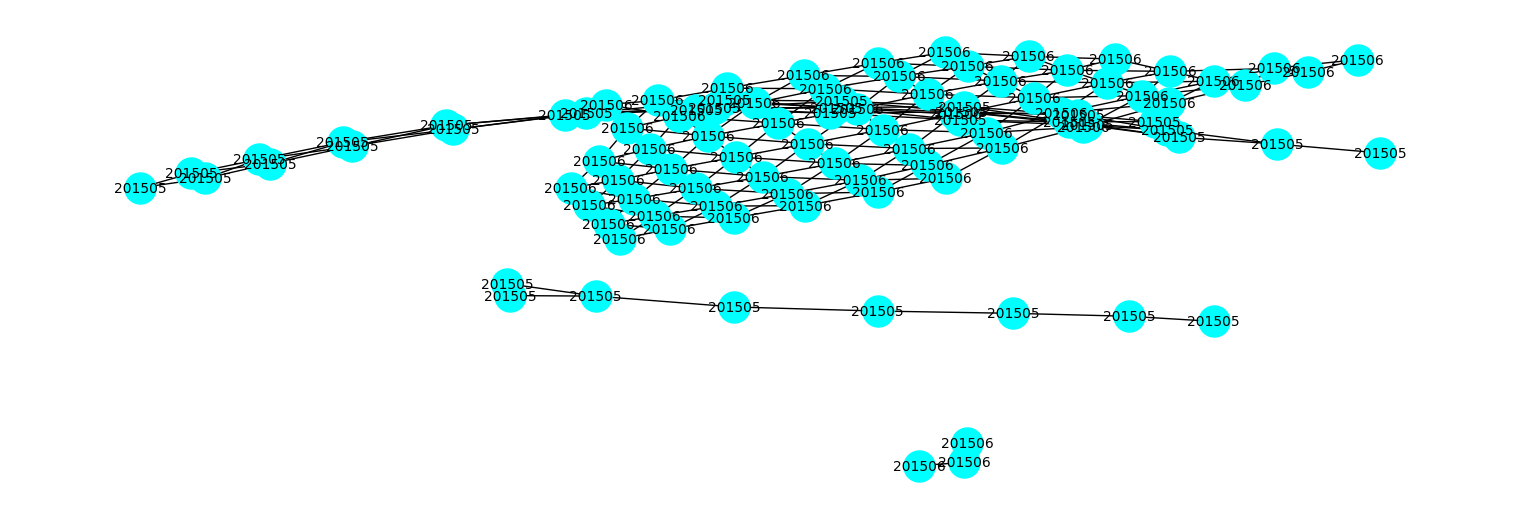

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 800, 900, "Month")

**Create 2 month temporal edges**

In [13]:
#DO NOT RUN THIS CODE BLOCK, IT IS THE LESS EFFICIENT VERSION OF THE BOTTOM CODE BLOCK
#Create Temporal Edges
total_index=0

for i, month in enumerate(unique_list_of_months[:-1]):
  dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
  dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]

  for i, row_i in dataset_subset_1.iterrows():
      for j, row_j in dataset_subset_2.iterrows():
        if row_j["Lon"] == row_i["Lon"] and row_j["Lat"] == row_i["Lat"]:
          Spatial_temporal_graph.add_edge(i, j)

  print("nodes processed: "+str(total_index))
  total_index = total_index+len(dataset_subset_1)

KeyboardInterrupt: 

In [14]:
#More Efficient Version
total_index = 0

for i, month in enumerate(unique_list_of_months[:-1]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_2 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+1]]

    # Create dictionaries for the coordinates
    coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
    coords_dict_2 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_2.iterrows()}

    # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
    for coord, idx1 in coords_dict_1.items():
        idx2 = coords_dict_2.get(coord)
        if idx2 is not None:
            Spatial_temporal_graph.add_edge(idx1, idx2)

    # Update and print the processed count
    total_index += len(dataset_subset_1)
    print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


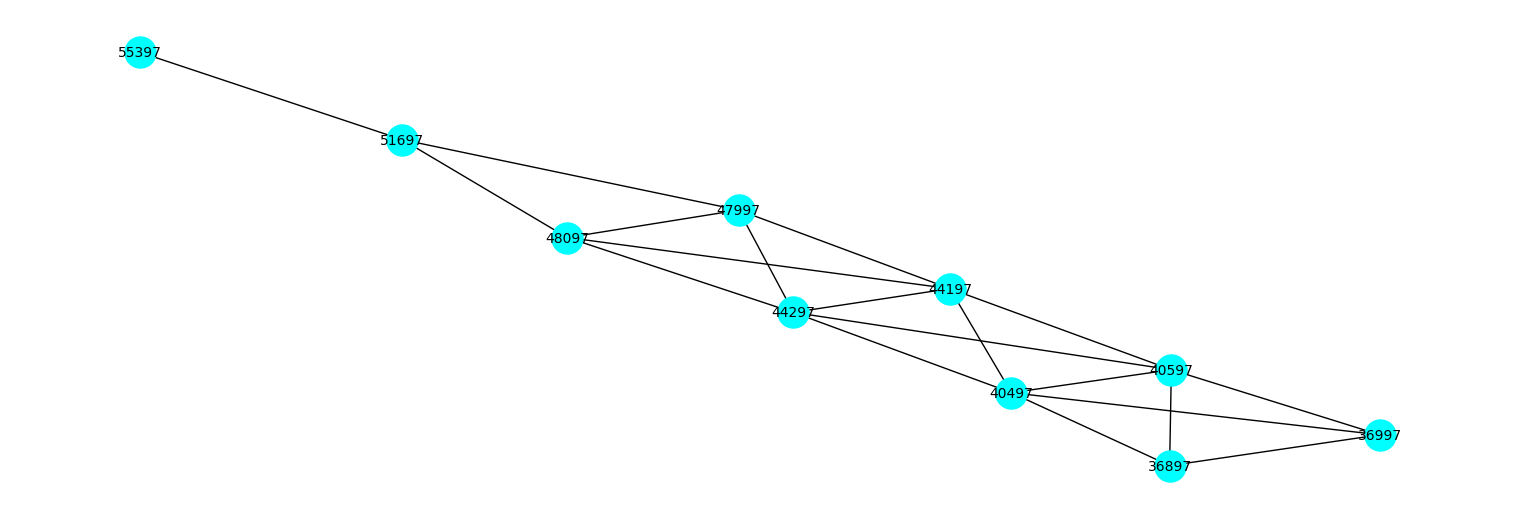

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 836, 846, "row_index")

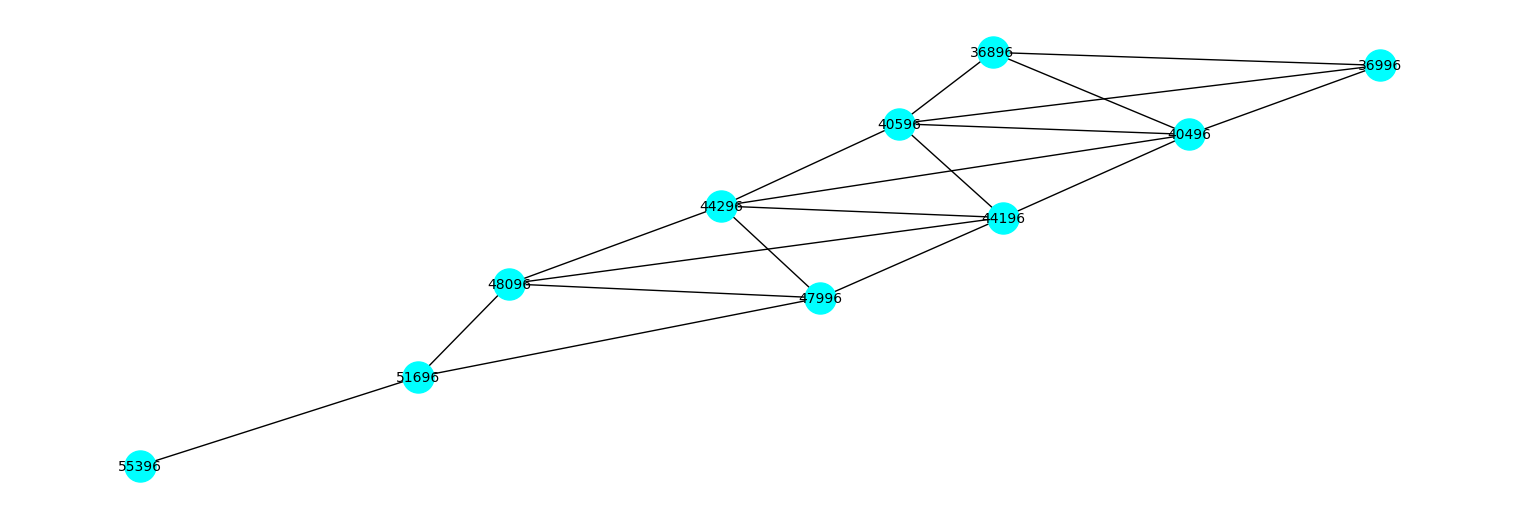

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

**Create 3 month temporal edges**

In [ ]:
total_index = 0

for i, month in enumerate(unique_list_of_months[:-2]):
    # Get the dataset for the current month and the next month
    dataset_subset_1 = sort_processed_dataset[sort_processed_dataset["Month"] == month]
    dataset_subset_3 = sort_processed_dataset[sort_processed_dataset["Month"] == unique_list_of_months[i+2]]

    # Create dictionaries for the coordinates
    coords_dict_1 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_1.iterrows()}
    coords_dict_3 = {(row["Lon"], row["Lat"]): idx for idx, row in dataset_subset_3.iterrows()}

    # Iterate through the first dictionary and check if the coordinates exist in the second dictionary
    for coord, idx1 in coords_dict_1.items():
        idx2 = coords_dict_3.get(coord)
        if idx2 is not None:
            Spatial_temporal_graph.add_edge(idx1, idx2)

    # Update and print the processed count
    total_index += len(dataset_subset_1)
    print("nodes processed: " + str(total_index))

nodes processed: 836
nodes processed: 1672
nodes processed: 2508
nodes processed: 3344
nodes processed: 4180
nodes processed: 5016
nodes processed: 5852
nodes processed: 6688
nodes processed: 7524
nodes processed: 8360
nodes processed: 9196
nodes processed: 10032
nodes processed: 10868
nodes processed: 11704
nodes processed: 12540
nodes processed: 13376
nodes processed: 14212
nodes processed: 15048
nodes processed: 15884
nodes processed: 16720
nodes processed: 17556
nodes processed: 18392
nodes processed: 19228
nodes processed: 20064
nodes processed: 20900
nodes processed: 21736
nodes processed: 22572
nodes processed: 23408
nodes processed: 24244
nodes processed: 25080
nodes processed: 25916
nodes processed: 26752
nodes processed: 27588
nodes processed: 28424
nodes processed: 29260
nodes processed: 30096
nodes processed: 30932
nodes processed: 31768
nodes processed: 32604
nodes processed: 33440
nodes processed: 34276
nodes processed: 35112
nodes processed: 35948
nodes processed: 36784


In [ ]:
list(Spatial_temporal_graph.edges())[0:3000]

[(36896, 36996),
 (36896, 40496),
 (36896, 40596),
 (36896, 36897),
 (36896, 36898),
 (40496, 36996),
 (40496, 44196),
 (40496, 44296),
 (40496, 40596),
 (40496, 40497),
 (40496, 40498),
 (44196, 48096),
 (44196, 44296),
 (44196, 47996),
 (44196, 40596),
 (44196, 44197),
 (44196, 44198),
 (47996, 48096),
 (47996, 44296),
 (47996, 51796),
 (47996, 51696),
 (47996, 47997),
 (47996, 47998),
 (51696, 48096),
 (51696, 55496),
 (51696, 55396),
 (51696, 51796),
 (51696, 51697),
 (51696, 51698),
 (55396, 55496),
 (55396, 59096),
 (55396, 51796),
 (55396, 55397),
 (55396, 55398),
 (36996, 37096),
 (36996, 33396),
 (36996, 40596),
 (36996, 40696),
 (36996, 36997),
 (36996, 36998),
 (40596, 37096),
 (40596, 44296),
 (40596, 40696),
 (40596, 44396),
 (40596, 40597),
 (40596, 40598),
 (44296, 48096),
 (44296, 40696),
 (44296, 48196),
 (44296, 44396),
 (44296, 44297),
 (44296, 44298),
 (48096, 48196),
 (48096, 44396),
 (48096, 51796),
 (48096, 51896),
 (48096, 48097),
 (48096, 48098),
 (51796, 48196

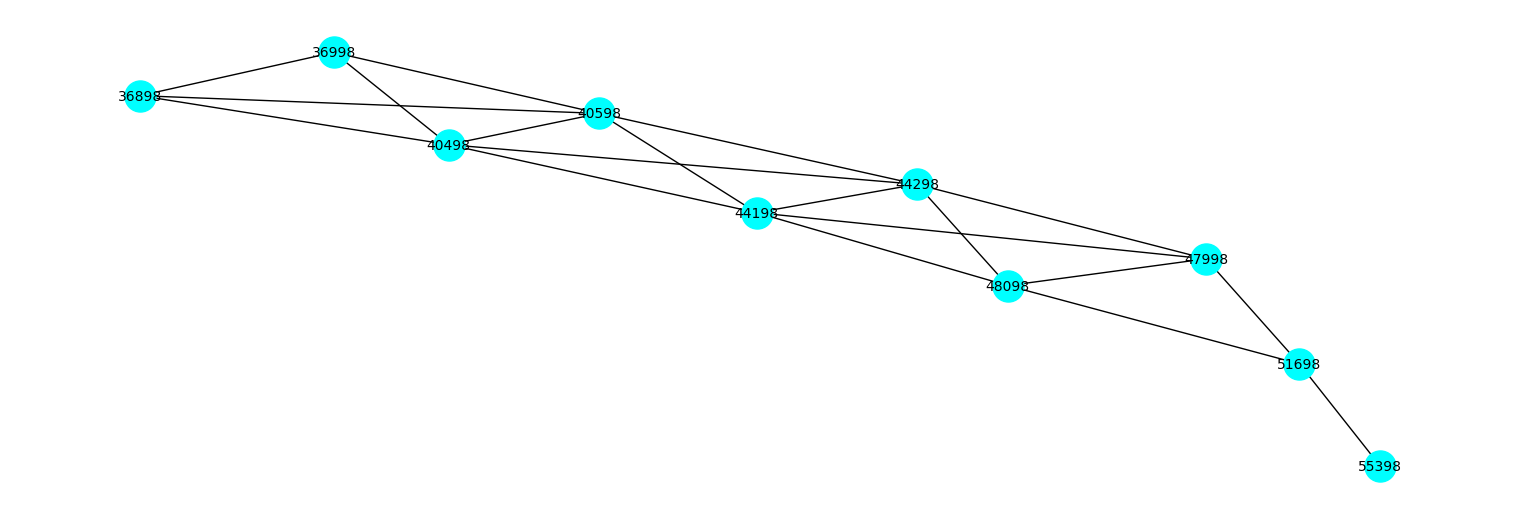

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 1672, 1682, "row_index")

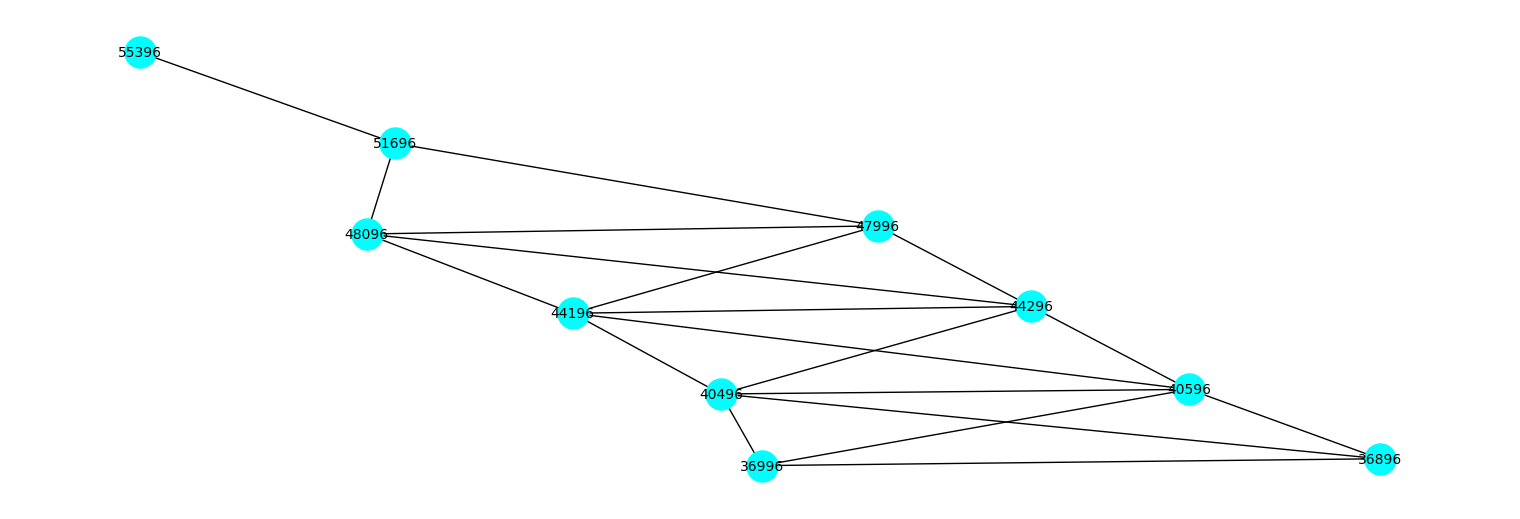

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 0, 10, "row_index")

**Save Graph**

In [15]:
import pickle

# save graph object to file
pickle.dump(Spatial_temporal_graph, open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_basic_version.pickle', 'wb'))


In [ ]:

# load graph object from file
Graph = pickle.load(open('/content/drive/MyDrive/DroughtCastAI/Dataset/Spatial_temporal_grpah_version_2.pickle', 'rb'))

In [ ]:
Graph.edges()

EdgeView([(36896, 36996), (36896, 40496), (36896, 40596), (36896, 36897), (36896, 36898), (40496, 36996), (40496, 44196), (40496, 44296), (40496, 40596), (40496, 40497), (40496, 40498), (44196, 48096), (44196, 44296), (44196, 47996), (44196, 40596), (44196, 44197), (44196, 44198), (47996, 48096), (47996, 44296), (47996, 51796), (47996, 51696), (47996, 47997), (47996, 47998), (51696, 48096), (51696, 55496), (51696, 55396), (51696, 51796), (51696, 51697), (51696, 51698), (55396, 55496), (55396, 59096), (55396, 51796), (55396, 55397), (55396, 55398), (36996, 37096), (36996, 33396), (36996, 40596), (36996, 40696), (36996, 36997), (36996, 36998), (40596, 37096), (40596, 44296), (40596, 40696), (40596, 44396), (40596, 40597), (40596, 40598), (44296, 48096), (44296, 40696), (44296, 48196), (44296, 44396), (44296, 44297), (44296, 44298), (48096, 48196), (48096, 44396), (48096, 51796), (48096, 51896), (48096, 48097), (48096, 48098), (51796, 48196), (51796, 55496), (51796, 51896), (51796, 55596)

**Graph Display and Test**

In [ ]:
def display_a_to_b_nodes(graph, a, b, attribute_name):
    # Extract nodes from index a to b
    nodes_subset = list(graph.nodes())[a:b]

    # Create a subgraph with these nodes
    subgraph = graph.subgraph(nodes_subset)

    # Create a dictionary for node labels based on the specified attribute
    node_labels = {node: subgraph.nodes[node].get(attribute_name, '') for node in subgraph.nodes()}

    # Draw the subgraph with the linear layout
    plt.figure(figsize=(15, 5))
    nx.draw(subgraph, with_labels=True, node_color="cyan", node_size=500, edge_color='black', linewidths=1, font_size=10, labels=node_labels)
    plt.show()

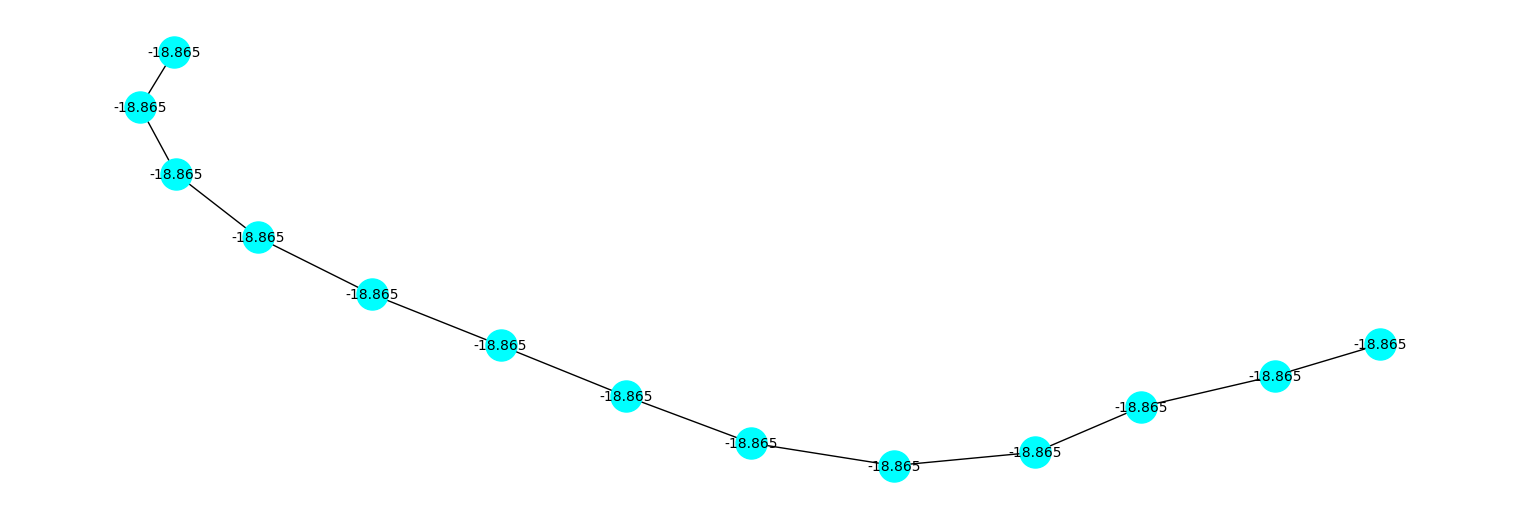

In [ ]:
display_a_to_b_nodes(Spatial_temporal_graph, 90, 103, "Lat")

In [ ]:
#Access node attibutes for the 80th node
Spatial_temporal_graph.nodes[list(Spatial_temporal_graph.nodes())[80]]

{'Lat': -17.068,
 'Lon': 15.271,
 'temperature_2m': 297.827,
 'temperature_2m_min': 291.844,
 'temperature_2m_max': 306.671,
 'dewpoint_temperature_2m': 285.132,
 'total_precipitation_sum': 0.000353725,
 'total_precipitation_min': 0.0,
 'total_precipitation_max': 0.00018689,
 'u_component_of_wind_10m': -1.58611,
 'v_component_of_wind_10m': -3.68987,
 'surface_net_solar_radiation_sum': 464593000.0,
 'total_evaporation_sum': -0.0178993,
 'soil_moisture_am': 0.138418,
 'soil_moisture_pm': 0.131772,
 'NDVI': 2218.14,
 'EVI': 1488.29,
 'next_month_tempreature': 301.28,
 'next_month_precipitation': 3.39397e-11,
 'year': 2022,
 'month2': 1,
 'spei01': -3.79605}

**Graph Neural Network**

In [ ]:
import os
import torch
os.environ['TORCH'] = torch.__version__
os.environ['PYTHONWARNINGS'] = "ignore"
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-9_efswok
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-9_efswok
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 6f5fabe08a870dd06ef9326aba811f5807620325
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.4.0-py3-none-any.whl size=1070410 sha256=cc9a7340924a77a6ac04b1cc940bd4d5df628df63b03710dbdc1c10635b49d6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-dhd47kaw/wheels/